In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-20.39480137567675 -63.67565085603567
-63.604082233624844 1.2245155513847976
-72.58116434615664 26.42516825482309
-58.59826531688989 -71.79771102219489
-65.74782255942347 82.3326571337015
81.58046973153637 -58.90775553509246
75.78920471128933 92.02568929723742
69.94818962167355 -105.3178932468683
33.71274401951851 80.85528518915254
-3.156421169890237 127.72821439194018
14.112351318320435 109.72027128432666
19.37975658865362 -143.00792228222724
-50.34775052807075 -155.6365451962779
-68.95309425475384 -48.46557874043262
3.1399328718813706 153.46460869689633
6.193471789509118 178.94783693562658
71.6785713846246 -129.1124645430193
-65.63862292523473 -162.79190322216166
-9.954212474158695 -177.0986151591531
28.949882873221 -139.96542718689486
89.53734982471613 -13.853218798986006
-63.96878839574621 -134.65518684428378
-39.7194189961661 -19.25478866140611
-8.933739472954699 -163.25633244271134
64.57419910797785 -1.2374205548195505
-27.633027489066535 67.90394273776369
16.14363137380552 -74.6

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camiri
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | leh
Processing Record 10 of Set 1 | ambon
Processing Record 11 of Set 1 | qui nhon
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | samusu
City not found. Skipping...
Proce

Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | ola
Processing Record 43 of Set 4 | north bend
Processing Record 44 of Set 4 | lakatoro
Processing Record 45 of Set 4 | igatpuri
Processing Record 46 of Set 4 | ijaki
City not found. Skipping...
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | nanortalik
Processing Record 1 of Set 5 | vitim
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | karratha
Processing Record 5 of Set 5 | yumen
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | portland
Processing Record 8 of Set 5 | galesong
Processing Record 9 of Set 5 | borba
Processing Record 10 of Set 5 | evensk
Processing Record 11 of Set 5 | vila franca do campo
Processing Record 12 of Set 5 | bailen
Processing Record 13 of S

City not found. Skipping...
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | kamaishi
Processing Record 31 of Set 8 | rio gallegos
Processing Record 32 of Set 8 | bourail
Processing Record 33 of Set 8 | porto walter
Processing Record 34 of Set 8 | fereydunshahr
Processing Record 35 of Set 8 | liverpool
Processing Record 36 of Set 8 | san juan
Processing Record 37 of Set 8 | mersing
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | anloga
Processing Record 40 of Set 8 | salalah
Processing Record 41 of Set 8 | poronaysk
Processing Record 42 of Set 8 | yelan
Processing Record 43 of Set 8 | cuyamel
Processing Record 44 of Set 8 | seoul
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | teahupoo
Processing Record 47 of Set 8 | sao gabriel da cachoeira
Processing Record 48 of Set 8 | hollola
Processing Record 49 of Set 8 | rio bananal
Processing Record 50 of Set 8 | muana
Processing Record 1 of Set 9 | taybad
Processing Record 2

Processing Record 16 of Set 12 | tabialan
City not found. Skipping...
Processing Record 17 of Set 12 | aripuana
Processing Record 18 of Set 12 | meiganga
Processing Record 19 of Set 12 | ardistan
City not found. Skipping...
Processing Record 20 of Set 12 | bryan
Processing Record 21 of Set 12 | arlit
Processing Record 22 of Set 12 | poli
Processing Record 23 of Set 12 | tel aviv-yafo
Processing Record 24 of Set 12 | jiazi
Processing Record 25 of Set 12 | kishapu
Processing Record 26 of Set 12 | zastron
Processing Record 27 of Set 12 | brzeziny
Processing Record 28 of Set 12 | churapcha
Processing Record 29 of Set 12 | saint-augustin
Processing Record 30 of Set 12 | eskisehir
Processing Record 31 of Set 12 | podosinovets
Processing Record 32 of Set 12 | valparaiso
Processing Record 33 of Set 12 | olinda
Processing Record 34 of Set 12 | marabba
Processing Record 35 of Set 12 | oranjemund
Processing Record 36 of Set 12 | erzin
Processing Record 37 of Set 12 | marsa matruh
Processing Recor

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camiri,-20.0500,-63.5167,76.78,73,75,3.44,BO,2022-12-11 22:25:06
1,Hermanus,-34.4187,19.2345,72.81,92,100,15.99,ZA,2022-12-11 22:25:06
2,Bredasdorp,-34.5322,20.0403,69.31,94,100,17.27,ZA,2022-12-11 22:25:07
3,Ushuaia,-54.8000,-68.3000,46.06,76,75,18.41,AR,2022-12-11 22:20:29
4,Busselton,-33.6500,115.3333,53.89,67,0,13.15,AU,2022-12-11 22:20:18
5,Upernavik,72.7868,-56.1549,7.54,92,38,16.75,GL,2022-12-11 22:25:07
6,Talnakh,69.4865,88.3972,-20.87,99,100,10.80,RU,2022-12-11 22:25:08
7,Yellowknife,62.4560,-114.3525,-8.88,77,100,4.61,CA,2022-12-11 22:25:08
8,Leh,34.1667,77.5833,15.71,52,27,0.85,IN,2022-12-11 22:25:08
9,Ambon,-3.6954,128.1814,79.23,14,20,5.75,ID,2022-12-11 22:25:09


In [19]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camiri,BO,2022-12-11 22:25:06,-20.0500,-63.5167,76.78,73,75,3.44
1,Hermanus,ZA,2022-12-11 22:25:06,-34.4187,19.2345,72.81,92,100,15.99
2,Bredasdorp,ZA,2022-12-11 22:25:07,-34.5322,20.0403,69.31,94,100,17.27
3,Ushuaia,AR,2022-12-11 22:20:29,-54.8000,-68.3000,46.06,76,75,18.41
4,Busselton,AU,2022-12-11 22:20:18,-33.6500,115.3333,53.89,67,0,13.15
...,...,...,...,...,...,...,...,...,...
549,Yablonovo,RU,2022-12-11 22:40:50,50.8523,37.3574,38.86,86,100,21.50
550,Babol,IR,2022-12-11 22:40:50,36.5513,52.6790,46.74,75,0,2.62
551,Cockburn Town,TC,2022-12-11 22:40:51,21.4612,-71.1419,77.36,62,42,12.12
552,Carbondale,US,2022-12-11 22:40:51,37.7273,-89.2168,43.09,82,100,6.91


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

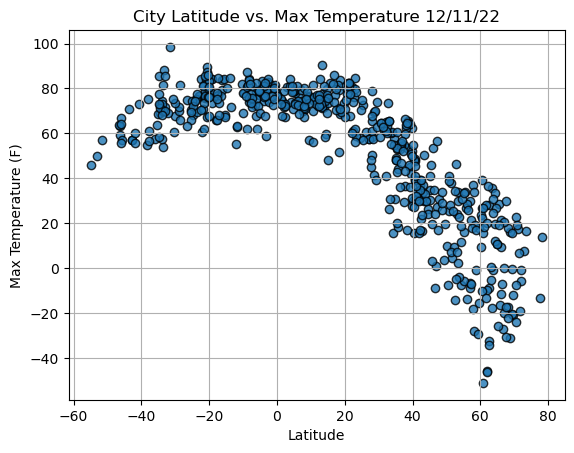

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

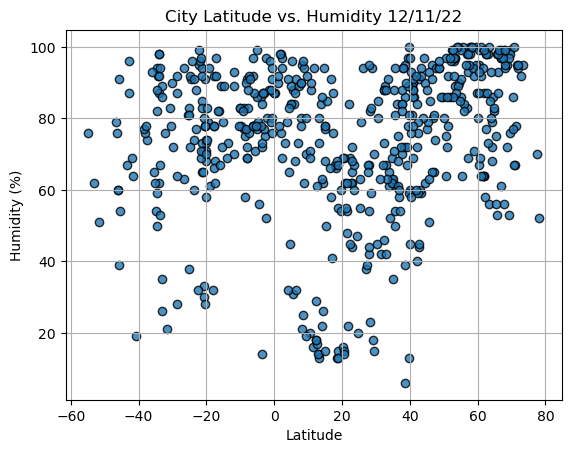

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

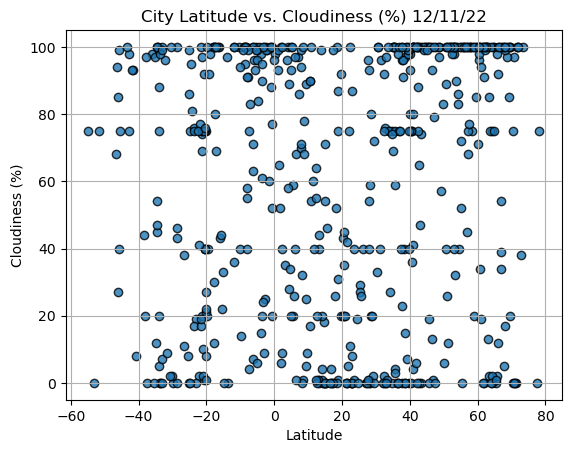

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

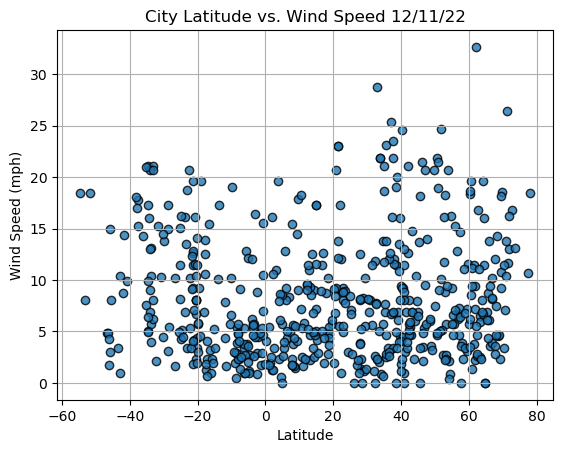

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()